In [303]:
import os
import requests
from datetime import datetime, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import rarfile
import timeit
from scipy.stats import pearsonr, spearmanr
print("Setup done")

Setup done


In [ ]:
url = "https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip"
folder = "data"
if not os.path.exists("data"):
    os.makedirs("data")

filename = os.path.join(folder, f"household_power_consumption.zip")
target_filename = "household_power_consumption.txt"

try:
    recieved_data = requests.get(url, timeout=3)
    print(recieved_data)
    recieved_data.raise_for_status()
    with open(filename, "wb") as file:
        file.write(recieved_data.content)
    print(f"Saving file in {filename} [OK]")

    if zipfile.is_zipfile(filename):
        with zipfile.ZipFile(filename, "r") as zip_ref:
            zip_ref.extractall("data")

    os.remove(os.path.join(filename))
    dataframe = pd.DataFrame()

    dataframe = pd.read_csv(os.path.join(folder, target_filename), sep=';', na_values='?')
    dataframe = dataframe.dropna()
    dataframe['Date'] = pd.to_datetime(dataframe['Date'], format='%d/%m/%Y')
    dataframe['Time'] = pd.to_datetime(dataframe['Time'], format='%H:%M:%S').dt.time

    dataframe_numpy = dataframe.to_numpy()
    display(dataframe)

except Exception as e:
    print(f"[Error] {e}")

<Response [200]>
Saving file in data\household_power_consumption.zip [OK]


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


1 задание

Обрати всі записи, у яких загальна активна споживана потужність
перевищує 5 кВт.

In [305]:

edited = dataframe[dataframe["Global_active_power"] > 5]
display(edited)
time_100 = timeit.timeit('dataframe[dataframe["Global_active_power"] > 5]', globals = globals(), number=100)
print(f"Time is {time_100:.6f} seconds")

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
11,2006-12-16,17:35:00,5.412,0.470,232.78,23.2,0.0,1.0,17.0
12,2006-12-16,17:36:00,5.224,0.478,232.99,22.4,0.0,1.0,16.0
...,...,...,...,...,...,...,...,...,...
2069356,2010-11-22,18:40:00,5.408,0.150,231.50,23.6,48.0,0.0,0.0
2069357,2010-11-22,18:41:00,5.528,0.144,232.48,24.6,53.0,0.0,0.0
2071586,2010-11-24,07:50:00,5.172,0.050,235.18,22.0,0.0,38.0,17.0
2071587,2010-11-24,07:51:00,5.750,0.000,234.40,24.6,0.0,39.0,17.0


Time is 0.584190 seconds


In [306]:
index = dataframe.columns.get_loc('Global_active_power')
filtered = dataframe_numpy[dataframe_numpy[:, index] > 5]
display(filtered)

time_100 = timeit.timeit("dataframe_numpy[dataframe_numpy[:, dataframe.columns.get_loc('Global_active_power')] > 5]", globals = globals(), number=100)

print(f"Time is {time_100:.6f} seconds")

array([[Timestamp('2006-12-16 00:00:00'), datetime.time(17, 25), 5.36,
        ..., 0.0, 1.0, 16.0],
       [Timestamp('2006-12-16 00:00:00'), datetime.time(17, 26), 5.374,
        ..., 0.0, 2.0, 17.0],
       [Timestamp('2006-12-16 00:00:00'), datetime.time(17, 27), 5.388,
        ..., 0.0, 1.0, 17.0],
       ...,
       [Timestamp('2010-11-24 00:00:00'), datetime.time(7, 50), 5.172,
        ..., 0.0, 38.0, 17.0],
       [Timestamp('2010-11-24 00:00:00'), datetime.time(7, 51), 5.75,
        ..., 0.0, 39.0, 17.0],
       [Timestamp('2010-11-25 00:00:00'), datetime.time(7, 21), 5.074,
        ..., 1.0, 2.0, 18.0]], shape=(17547, 9), dtype=object)

Time is 5.835844 seconds


2 задание

Обрати всі записи, у яких вольтаж перевищую 235 В.

In [307]:
edited = dataframe[dataframe['Voltage'] > 235]
display(edited)
time_100 = timeit.timeit("dataframe[dataframe['Voltage'] > 235]", globals = globals(), number=100)
print(f"Time is {time_100:.6f} seconds")

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,2006-12-16,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,2006-12-16,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,2006-12-16,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
14,2006-12-16,17:38:00,4.054,0.422,235.24,17.6,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


Time is 11.730456 seconds


In [308]:

index = dataframe.columns.get_loc('Voltage')
filtered = dataframe_numpy[dataframe_numpy[:, index] > 235]
display(filtered)

time_100 = timeit.timeit("dataframe_numpy[dataframe_numpy[:, dataframe.columns.get_loc('Voltage')] > 235]", globals = globals(), number=100)

print(f"Time is {time_100:.6f} seconds")

array([[Timestamp('2006-12-16 00:00:00'), datetime.time(17, 28), 3.666,
        ..., 0.0, 1.0, 17.0],
       [Timestamp('2006-12-16 00:00:00'), datetime.time(17, 29), 3.52,
        ..., 0.0, 2.0, 17.0],
       [Timestamp('2006-12-16 00:00:00'), datetime.time(17, 30), 3.702,
        ..., 0.0, 1.0, 17.0],
       ...,
       [Timestamp('2010-11-26 00:00:00'), datetime.time(21, 0), 0.938,
        ..., 0.0, 0.0, 0.0],
       [Timestamp('2010-11-26 00:00:00'), datetime.time(21, 1), 0.934,
        ..., 0.0, 0.0, 0.0],
       [Timestamp('2010-11-26 00:00:00'), datetime.time(21, 2), 0.932,
        ..., 0.0, 0.0, 0.0]], shape=(1952491, 9), dtype=object)

Time is 35.358529 seconds


3 задание

Обрати всі записи, у яких сила струму лежить в межах 19-20 А,
для них виявити ті, у яких пральна машина та холодильних (Sub_metering_2)
споживають більше, ніж бойлер та кондиціонер (Sub_metering_3).

In [309]:
edited = dataframe[dataframe["Global_intensity"].between(19, 20)]
edited = edited[edited["Sub_metering_2"] > edited["Sub_metering_3"]]
display(edited)

time_100 = timeit.timeit("dataframe[(dataframe['Global_intensity'].between(19, 20)) & (dataframe['Sub_metering_2'] > dataframe['Sub_metering_3'])]", globals = globals(), number=100)
print(f"Time is {time_100:.6f} seconds")

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
45,2006-12-16,18:09:00,4.464,0.136,234.66,19.0,0.0,37.0,16.0
460,2006-12-17,01:04:00,4.582,0.258,238.08,19.6,0.0,13.0,0.0
464,2006-12-17,01:08:00,4.618,0.104,239.61,19.6,0.0,27.0,0.0
475,2006-12-17,01:19:00,4.636,0.140,237.37,19.4,0.0,36.0,0.0
476,2006-12-17,01:20:00,4.634,0.152,237.17,19.4,0.0,35.0,0.0
...,...,...,...,...,...,...,...,...,...
2071589,2010-11-24,07:53:00,4.666,0.000,235.72,19.8,0.0,39.0,17.0
2071590,2010-11-24,07:54:00,4.694,0.000,236.78,19.8,0.0,39.0,18.0
2071591,2010-11-24,07:55:00,4.602,0.000,237.08,19.4,0.0,40.0,17.0
2071592,2010-11-24,07:56:00,4.536,0.000,237.03,19.0,0.0,39.0,17.0


Time is 1.324770 seconds


In [310]:

gi_idx = dataframe.columns.get_loc('Global_intensity')
sub2_idx = dataframe.columns.get_loc('Sub_metering_2')
sub3_idx = dataframe.columns.get_loc('Sub_metering_3')
filtered = dataframe_numpy[(dataframe_numpy[:, gi_idx] >= 19) & (dataframe_numpy[:, gi_idx] <= 20) & (dataframe_numpy[:, sub2_idx] > dataframe_numpy[:, sub3_idx])]
display(filtered)
display(pd.DataFrame(filtered, columns=dataframe.columns))

time_100 = timeit.timeit("dataframe_numpy[(dataframe_numpy[:, dataframe.columns.get_loc('Global_intensity')] >= 19) & (dataframe_numpy[:, dataframe.columns.get_loc('Global_intensity')] <= 20) &"
"(dataframe_numpy[:, dataframe.columns.get_loc('Sub_metering_2')] > dataframe_numpy[:, dataframe.columns.get_loc('Sub_metering_3')])]",
                         globals = globals(), number=100)

print(f"Time is {time_100:.6f} seconds")

array([[Timestamp('2006-12-16 00:00:00'), datetime.time(18, 9), 4.464,
        ..., 0.0, 37.0, 16.0],
       [Timestamp('2006-12-17 00:00:00'), datetime.time(1, 4), 4.582,
        ..., 0.0, 13.0, 0.0],
       [Timestamp('2006-12-17 00:00:00'), datetime.time(1, 8), 4.618,
        ..., 0.0, 27.0, 0.0],
       ...,
       [Timestamp('2010-11-24 00:00:00'), datetime.time(7, 55), 4.602,
        ..., 0.0, 40.0, 17.0],
       [Timestamp('2010-11-24 00:00:00'), datetime.time(7, 56), 4.536,
        ..., 0.0, 39.0, 17.0],
       [Timestamp('2010-11-24 00:00:00'), datetime.time(7, 57), 4.626,
        ..., 0.0, 39.0, 17.0]], shape=(2509, 9), dtype=object)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,18:09:00,4.464,0.136,234.66,19.0,0.0,37.0,16.0
1,2006-12-17,01:04:00,4.582,0.258,238.08,19.6,0.0,13.0,0.0
2,2006-12-17,01:08:00,4.618,0.104,239.61,19.6,0.0,27.0,0.0
3,2006-12-17,01:19:00,4.636,0.14,237.37,19.4,0.0,36.0,0.0
4,2006-12-17,01:20:00,4.634,0.152,237.17,19.4,0.0,35.0,0.0
...,...,...,...,...,...,...,...,...,...
2504,2010-11-24,07:53:00,4.666,0.0,235.72,19.8,0.0,39.0,17.0
2505,2010-11-24,07:54:00,4.694,0.0,236.78,19.8,0.0,39.0,18.0
2506,2010-11-24,07:55:00,4.602,0.0,237.08,19.4,0.0,40.0,17.0
2507,2010-11-24,07:56:00,4.536,0.0,237.03,19.0,0.0,39.0,17.0


Time is 12.932155 seconds


4 задания

Обрати випадковим чином 500000 записів (без повторів елементів
вибірки), для них обчислити середні величини усіх 3-х груп
споживання електричної енергії

In [311]:

part = dataframe.sample(n=500000, replace=False, random_state=64)
mean_sub1_pd = part['Sub_metering_1'].mean()
mean_sub2_pd = part['Sub_metering_2'].mean()
mean_sub3_pd = part['Sub_metering_3'].mean()

print("Pandas Sample:")
display(part)
print("Середнє sub_metering_1:", mean_sub1_pd)
print("Середнє sub_metering_2:", mean_sub2_pd)
print("Середнє sub_metering_3:", mean_sub3_pd)

time_100 = timeit.timeit("dataframe.sample(n=500000, replace=False, random_state=64)[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()", globals = globals(), number=100)
print(f"Time is {time_100:.6f} seconds")

Pandas Sample:


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
141427,2007-03-24,22:31:00,3.530,0.366,237.95,14.8,0.0,2.0,0.0
1726193,2010-03-29,11:17:00,1.468,0.222,239.46,6.2,0.0,2.0,18.0
228866,2007-05-24,15:50:00,0.312,0.088,235.13,1.4,0.0,0.0,0.0
1940041,2010-08-24,23:25:00,0.302,0.110,243.35,1.4,0.0,0.0,1.0
2053828,2010-11-11,23:52:00,0.232,0.068,240.64,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1380442,2009-08-01,08:46:00,0.818,0.140,240.65,3.4,0.0,0.0,12.0
1417257,2009-08-26,22:21:00,0.402,0.112,245.64,1.6,0.0,0.0,1.0
737275,2008-05-11,17:19:00,0.942,0.174,241.30,4.0,0.0,0.0,1.0
888472,2008-08-24,17:16:00,0.174,0.150,239.46,0.8,0.0,0.0,1.0


Середнє sub_metering_1: 1.132344
Середнє sub_metering_2: 1.303284
Середнє sub_metering_3: 6.45155
Time is 21.808185 seconds


In [ ]:
def numpy_random_func(dataframe_numpy, dataframe):
    sample_np = dataframe_numpy[np.random.choice(dataframe_numpy.shape[0], size=500000, replace=False)]
    mean_sub1 = np.mean(sample_np[:, dataframe.columns.get_loc('Sub_metering_1')])
    mean_sub2 = np.mean(sample_np[:, dataframe.columns.get_loc('Sub_metering_2')])
    mean_sub3 = np.mean(sample_np[:, dataframe.columns.get_loc('Sub_metering_3')])

    return mean_sub1, mean_sub2, mean_sub3, sample_np

mean1, mean2, mean3, filtered = numpy_random_func(dataframe_numpy, dataframe)
display(filtered)
display(pd.DataFrame(filtered, columns=dataframe.columns))
print(f"Sub_metering_1: {mean1}")
print(f"Sub_metering_2: {mean2}")
print(f"Sub_metering_3: {mean3}")

time_100 = timeit.timeit("numpy_random_func(dataframe_numpy, dataframe)", globals = globals(), number=100)

print(f"Time is {time_100:.6f} seconds")

array([[Timestamp('2007-03-15 00:00:00'), datetime.time(0, 30), 0.462,
        ..., 0.0, 1.0, 0.0],
       [Timestamp('2008-06-04 00:00:00'), datetime.time(5, 37), 0.288,
        ..., 0.0, 0.0, 0.0],
       [Timestamp('2007-09-05 00:00:00'), datetime.time(16, 20), 0.152,
        ..., 0.0, 1.0, 0.0],
       ...,
       [Timestamp('2010-11-14 00:00:00'), datetime.time(14, 32), 1.536,
        ..., 0.0, 0.0, 17.0],
       [Timestamp('2007-09-16 00:00:00'), datetime.time(6, 10), 0.206,
        ..., 0.0, 0.0, 0.0],
       [Timestamp('2010-10-06 00:00:00'), datetime.time(0, 24), 0.81,
        ..., 0.0, 0.0, 0.0]], shape=(500000, 9), dtype=object)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2007-03-15,00:30:00,0.462,0.092,241.45,2.0,0.0,1.0,0.0
1,2008-06-04,05:37:00,0.288,0.094,235.95,1.2,0.0,0.0,0.0
2,2007-09-05,16:20:00,0.152,0.0,241.28,0.8,0.0,1.0,0.0
3,2007-07-12,17:51:00,1.282,0.094,240.59,5.2,0.0,1.0,18.0
4,2008-11-22,14:58:00,0.432,0.1,239.54,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
499995,2008-08-04,02:39:00,0.306,0.222,237.84,1.6,0.0,0.0,1.0
499996,2010-06-07,16:07:00,0.174,0.0,242.05,0.8,0.0,0.0,1.0
499997,2010-11-14,14:32:00,1.536,0.054,234.96,6.4,0.0,0.0,17.0
499998,2007-09-16,06:10:00,0.206,0.13,241.98,1.0,0.0,0.0,0.0


Sub_metering_1: 1.122658
Sub_metering_2: 1.285656
Sub_metering_3: 6.455786
Time is 49.720310 seconds


5 задания

Обрати ті записи, які після 18-00 споживають понад 6 кВт за
хвилину в середньому, серед відібраних визначити ті, у яких
основне споживання електроенергії у вказаний проміжок часу
припадає на пральну машину, сушарку, холодильник та освітлення
(група 2 є найбільшою), а потім обрати кожен третій результат із
першої половини та кожен четвертий результат із другої половини.

In [ ]:

def fifth_func(dataframe):
    filtered = dataframe[(dataframe['Time'] > pd.to_datetime('18:00:00').time()) & (dataframe['Global_active_power'] > 6)]
    filtered = filtered[(filtered['Sub_metering_2'] > filtered['Sub_metering_1']) & (filtered['Sub_metering_2'] > filtered['Sub_metering_3'])]
    part1 = filtered.iloc[:len(filtered) // 2].iloc[2::3] #кожен третій
    part2 = filtered.iloc[len(filtered) // 2:].iloc[3::4] #кожен четвертий
    filtered = pd.concat([part1, part2])
    return filtered

filtered = fifth_func(dataframe)
display(filtered)

time_100 = timeit.timeit("fifth_func(dataframe)", globals = globals(), number=100)
print(f"Time is {time_100:.6f} seconds")

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
43,2006-12-16,18:07:00,6.474,0.144,231.85,27.8,0.0,37.0,16.0
3007,2006-12-18,19:31:00,6.158,0.442,229.08,27.0,0.0,36.0,0.0
17497,2006-12-28,21:01:00,7.062,0.270,235.76,30.2,2.0,65.0,17.0
17500,2006-12-28,21:04:00,7.376,0.238,234.67,31.4,1.0,72.0,17.0
17503,2006-12-28,21:07:00,7.248,0.000,235.34,30.8,1.0,72.0,17.0
...,...,...,...,...,...,...,...,...,...
2066466,2010-11-20,18:30:00,6.620,0.314,229.00,29.2,18.0,34.0,16.0
2066470,2010-11-20,18:34:00,6.266,0.360,229.82,27.6,14.0,35.0,16.0
2066474,2010-11-20,18:38:00,6.302,0.376,229.65,27.8,15.0,34.0,17.0
2066478,2010-11-20,18:42:00,6.238,0.344,229.37,27.6,14.0,35.0,16.0


Time is 8.705711 seconds


In [314]:
def fifth_func_(dataframe_numpy):
    filtered = dataframe_numpy[(dataframe_numpy[:, 1] > pd.to_datetime('18:00:00').time()) & (dataframe_numpy[:, 2] > 6) &
        (dataframe_numpy[:, 7] > dataframe_numpy[:, 6]) & (dataframe_numpy[:, 7] > dataframe_numpy[:, 8])]

    part1 = filtered[:len(filtered)//2][2::3]
    part2 = filtered[len(filtered)//2:][3::4]
    filtered = np.concatenate((part1, part2), axis=0)

    return filtered

filtered = fifth_func_(dataframe_numpy)
display(filtered)
display(pd.DataFrame(filtered, columns=dataframe.columns))

time_100 = timeit.timeit("fifth_func_(dataframe_numpy)", globals = globals(), number=100)
print(f"Time is {time_100:.6f} seconds")

array([[Timestamp('2006-12-16 00:00:00'), datetime.time(18, 7), 6.474,
        ..., 0.0, 37.0, 16.0],
       [Timestamp('2006-12-18 00:00:00'), datetime.time(19, 31), 6.158,
        ..., 0.0, 36.0, 0.0],
       [Timestamp('2006-12-28 00:00:00'), datetime.time(21, 1), 7.062,
        ..., 2.0, 65.0, 17.0],
       ...,
       [Timestamp('2010-11-20 00:00:00'), datetime.time(18, 38), 6.302,
        ..., 15.0, 34.0, 17.0],
       [Timestamp('2010-11-20 00:00:00'), datetime.time(18, 42), 6.238,
        ..., 14.0, 35.0, 16.0],
       [Timestamp('2010-11-20 00:00:00'), datetime.time(18, 46), 6.438,
        ..., 13.0, 39.0, 16.0]], shape=(308, 9), dtype=object)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,18:07:00,6.474,0.144,231.85,27.8,0.0,37.0,16.0
1,2006-12-18,19:31:00,6.158,0.442,229.08,27.0,0.0,36.0,0.0
2,2006-12-28,21:01:00,7.062,0.27,235.76,30.2,2.0,65.0,17.0
3,2006-12-28,21:04:00,7.376,0.238,234.67,31.4,1.0,72.0,17.0
4,2006-12-28,21:07:00,7.248,0.0,235.34,30.8,1.0,72.0,17.0
...,...,...,...,...,...,...,...,...,...
303,2010-11-20,18:30:00,6.62,0.314,229.0,29.2,18.0,34.0,16.0
304,2010-11-20,18:34:00,6.266,0.36,229.82,27.6,14.0,35.0,16.0
305,2010-11-20,18:38:00,6.302,0.376,229.65,27.8,15.0,34.0,17.0
306,2010-11-20,18:42:00,6.238,0.344,229.37,27.6,14.0,35.0,16.0


Time is 13.718624 seconds


**2 частина**


In [ ]:
names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class']

data = np.genfromtxt("C:/Users/Asus/OneDrive/Desktop/4 семестр/AD/lab_4/data/chronic_kidney_disease.arff", delimiter=',', dtype=str, skip_header=38)
cleaned = np.char.strip(data)

display(cleaned)

df = pd.DataFrame(cleaned, columns=names)
numeric_columns = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

display(df)

array([['53', '90', '1.020', ..., 'no', 'yes', 'ckd'],
       ['50', '60', '1.010', ..., 'no', 'yes', 'ckd'],
       ['63', '70', '1.010', ..., 'yes', 'no', 'ckd'],
       ...,
       ['12', '80', '1.020', ..., 'no', 'no', 'notckd'],
       ['17', '60', '1.025', ..., 'no', 'no', 'notckd'],
       ['58', '80', '1.025', ..., 'no', 'no', 'notckd']],
      shape=(391, 25), dtype='<U10')

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd
1,50.0,60.0,1.010,2.0,4.0,?,abnormal,present,notpresent,490.0,...,28.0,NaN,NaN,yes,yes,no,good,no,yes,ckd
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,ckd
3,68.0,70.0,1.015,3.0,1.0,?,normal,present,notpresent,208.0,...,28.0,12200.0,3.4,yes,yes,yes,poor,yes,no,ckd
4,68.0,70.0,NaN,NaN,NaN,?,?,notpresent,notpresent,98.0,...,NaN,NaN,NaN,yes,yes,yes,poor,yes,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
387,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
388,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
389,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


1 завдання

Поборотися із зниклими даними.

In [316]:
def dropna_pandas(df):
    edited = df.copy()
    edited = df.replace('?', np.nan)
    edited = edited.dropna()
    return edited

edited_df = dropna_pandas(df)
display(edited_df)
# display(df)
time_100 = timeit.timeit("dropna_pandas(df)", globals = globals(), number=100)
print(f"Time is {time_100:.6f} seconds")


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,ckd
5,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,ckd
11,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,ckd
13,48.0,80.0,1.025,4.0,0.0,normal,abnormal,notpresent,notpresent,95.0,...,32.0,6900.0,3.4,yes,no,no,good,no,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
387,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
388,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
389,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


Time is 0.228346 seconds


In [ ]:

def dropna_numpy(cleaned):
    data_copy = cleaned.copy()
    data_copy[data_copy == '?'] = np.nan

    data_clean = data_copy[~np.any(data_copy == "nan", axis=1)]
    return data_clean

data_clean = dropna_numpy(cleaned)
display(data_clean)

time_100 = timeit.timeit("dropna_numpy(cleaned)", globals=globals(), number=100)
print(f"Time is {time_100:.6f} seconds")

array([['53', '90', '1.020', ..., 'no', 'yes', 'ckd'],
       ['63', '70', '1.010', ..., 'yes', 'no', 'ckd'],
       ['68', '80', '1.010', ..., 'yes', 'no', 'ckd'],
       ...,
       ['12', '80', '1.020', ..., 'no', 'no', 'notckd'],
       ['17', '60', '1.025', ..., 'no', 'no', 'notckd'],
       ['58', '80', '1.025', ..., 'no', 'no', 'notckd']],
      shape=(157, 25), dtype='<U10')

Time is 0.053425 seconds


In [319]:
df = edited_df
df_numpy = data_clean

2 задание 

Пронормувати вибраний датасет 

In [ ]:
def norming(df):
    norm = df.copy()
    for col in numeric_columns:
        min  = df[col].min()
        max = df[col].max()
        norm[col] = (df[col] - min) / (max - min)
    return norm

display(norming(df))
display(df)

time_100 = timeit.timeit("norming(df)", globals=globals(), number=100)
print(f"Time is {time_100:.6f} seconds")

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0.610390,0.666667,0.75,0.50,0.0,abnormal,abnormal,present,notpresent,0.000000,...,0.444444,0.367257,0.271186,yes,yes,no,poor,no,yes,ckd
2,0.740260,0.333333,0.25,0.75,0.0,abnormal,abnormal,present,notpresent,0.738095,...,0.511111,0.030973,0.288136,yes,yes,no,poor,yes,no,ckd
5,0.805195,0.500000,0.25,0.75,0.4,normal,abnormal,present,present,0.207143,...,0.155556,0.318584,0.084746,yes,yes,yes,poor,yes,no,ckd
11,0.714286,0.500000,0.50,0.50,0.0,abnormal,abnormal,notpresent,notpresent,0.245238,...,0.333333,0.238938,0.186441,yes,yes,yes,poor,yes,yes,ckd
13,0.545455,0.500000,1.00,1.00,0.0,normal,abnormal,notpresent,notpresent,0.059524,...,0.511111,0.137168,0.220339,yes,no,no,good,no,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,0.636364,0.500000,0.75,0.00,0.0,normal,normal,notpresent,notpresent,0.166667,...,0.844444,0.128319,0.474576,no,no,no,good,no,no,notckd
387,0.467532,0.333333,1.00,0.00,0.0,normal,normal,notpresent,notpresent,0.011905,...,1.000000,0.176991,0.694915,no,no,no,good,no,no,notckd
388,0.077922,0.500000,0.75,0.00,0.0,normal,normal,notpresent,notpresent,0.071429,...,0.888889,0.123894,0.559322,no,no,no,good,no,no,notckd
389,0.142857,0.166667,1.00,0.00,0.0,normal,normal,notpresent,notpresent,0.104762,...,0.933333,0.150442,0.644068,no,no,no,good,no,no,notckd


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,ckd
5,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,ckd
11,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,ckd
13,48.0,80.0,1.025,4.0,0.0,normal,abnormal,notpresent,notpresent,95.0,...,32.0,6900.0,3.4,yes,no,no,good,no,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
387,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
388,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
389,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


Time is 0.449613 seconds


In [ ]:
def norming_numpy(dataframe_numpy, dataframe):
    norm = dataframe_numpy.copy()
    for col in numeric_columns:
        idx = dataframe.columns.get_loc(col)
        min  = dataframe_numpy[:, idx].astype(float).min()
        max = dataframe_numpy[:, idx].astype(float).max()
        norm[:, idx] = (dataframe_numpy[:, idx].astype(float) - min) / (max - min)
    return norm

display(norming_numpy(df_numpy, df))
display(pd.DataFrame(norming_numpy(df_numpy, df), columns=norming(df).columns))
display(df)

time_100 = timeit.timeit("norming_numpy(df_numpy, df)", globals=globals(), number=100)
print(f"Time is {time_100:.6f} seconds")

array([['0.61038961', '0.66666666', '0.75000000', ..., 'no', 'yes',
        'ckd'],
       ['0.74025974', '0.33333333', '0.25000000', ..., 'yes', 'no',
        'ckd'],
       ['0.80519480', '0.5', '0.25000000', ..., 'yes', 'no', 'ckd'],
       ...,
       ['0.07792207', '0.5', '0.75000000', ..., 'no', 'no', 'notckd'],
       ['0.14285714', '0.16666666', '1.0', ..., 'no', 'no', 'notckd'],
       ['0.67532467', '0.5', '1.0', ..., 'no', 'no', 'notckd']],
      shape=(157, 25), dtype='<U10')

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0.61038961,0.66666666,0.75000000,0.5,0.0,abnormal,abnormal,present,notpresent,0.0,...,0.44444444,0.36725663,0.27118644,yes,yes,no,poor,no,yes,ckd
1,0.74025974,0.33333333,0.25000000,0.75,0.0,abnormal,abnormal,present,notpresent,0.73809523,...,0.51111111,0.03097345,0.28813559,yes,yes,no,poor,yes,no,ckd
2,0.80519480,0.5,0.25000000,0.75,0.4,normal,abnormal,present,present,0.20714285,...,0.15555555,0.31858407,0.08474576,yes,yes,yes,poor,yes,no,ckd
3,0.71428571,0.5,0.5,0.5,0.0,abnormal,abnormal,notpresent,notpresent,0.24523809,...,0.33333333,0.23893805,0.18644067,yes,yes,yes,poor,yes,yes,ckd
4,0.54545454,0.5,1.0,1.0,0.0,normal,abnormal,notpresent,notpresent,0.05952380,...,0.51111111,0.13716814,0.22033898,yes,no,no,good,no,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.63636363,0.5,0.75000000,0.0,0.0,normal,normal,notpresent,notpresent,0.16666666,...,0.84444444,0.12831858,0.47457627,no,no,no,good,no,no,notckd
153,0.46753246,0.33333333,1.0,0.0,0.0,normal,normal,notpresent,notpresent,0.01190476,...,1.0,0.17699115,0.69491525,no,no,no,good,no,no,notckd
154,0.07792207,0.5,0.75000000,0.0,0.0,normal,normal,notpresent,notpresent,0.07142857,...,0.88888888,0.12389380,0.55932203,no,no,no,good,no,no,notckd
155,0.14285714,0.16666666,1.0,0.0,0.0,normal,normal,notpresent,notpresent,0.10476190,...,0.93333333,0.15044247,0.64406779,no,no,no,good,no,no,notckd


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,ckd
5,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,ckd
11,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,ckd
13,48.0,80.0,1.025,4.0,0.0,normal,abnormal,notpresent,notpresent,95.0,...,32.0,6900.0,3.4,yes,no,no,good,no,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
387,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
388,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
389,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


Time is 0.460575 seconds


2.2 задание

стандартизувати 

In [322]:
def standartization(dataframe):
    standarted = dataframe.copy()
    for col in numeric_columns:
        mean = dataframe[col].mean()
        std = dataframe[col].std()
        standarted[col] = (dataframe[col] - mean) / std
    return standarted

display(standartization(df))
display(df)

time_100 = timeit.timeit("standartization(df)", globals=globals(), number=100)
print(f"Time is {time_100:.6f} seconds")


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0.220209,1.420932,0.005913,0.877205,-0.312324,abnormal,abnormal,present,notpresent,-0.943130,...,-1.426550,1.152888,-1.175151,yes,yes,no,poor,no,yes,ckd
2,0.862825,-0.363759,-1.850868,1.594503,-0.312324,abnormal,abnormal,present,notpresent,3.816036,...,-1.096861,-1.272405,-1.077066,yes,yes,no,poor,yes,no,ckd
5,1.184134,0.528587,-1.850868,1.594503,2.139419,normal,abnormal,present,present,0.392507,...,-2.855200,0.801859,-2.254091,yes,yes,yes,poor,yes,no,ckd
11,0.734302,0.528587,-0.922477,0.877205,-0.312324,abnormal,abnormal,notpresent,notpresent,0.638141,...,-1.976031,0.227447,-1.665578,yes,yes,yes,poor,yes,yes,ckd
13,-0.101100,0.528587,0.934304,2.311801,-0.312324,normal,abnormal,notpresent,notpresent,-0.559327,...,-1.096861,-0.506523,-1.469408,yes,no,no,good,no,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,0.348732,0.528587,0.005913,-0.557391,-0.312324,normal,normal,notpresent,notpresent,0.131520,...,0.551581,-0.570346,0.001874,no,no,no,good,no,no,notckd
387,-0.486670,-0.363759,0.934304,-0.557391,-0.312324,normal,normal,notpresent,notpresent,-0.866370,...,1.320854,-0.219317,1.276985,no,no,no,good,no,no,notckd
388,-2.414519,0.528587,0.005913,-0.557391,-0.312324,normal,normal,notpresent,notpresent,-0.482566,...,0.771373,-0.602258,0.492301,no,no,no,good,no,no,notckd
389,-2.093211,-1.256104,0.934304,-0.557391,-0.312324,normal,normal,notpresent,notpresent,-0.267636,...,0.991165,-0.410788,0.982729,no,no,no,good,no,no,notckd


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,ckd
5,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,ckd
11,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,ckd
13,48.0,80.0,1.025,4.0,0.0,normal,abnormal,notpresent,notpresent,95.0,...,32.0,6900.0,3.4,yes,no,no,good,no,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
387,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
388,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
389,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


Time is 0.529000 seconds


In [323]:
def standartization_numpy(dataframe_numpy, dataframe):
    standarted = dataframe_numpy.copy()
    for col in numeric_columns:
        idx = dataframe.columns.get_loc(col)
        mean = dataframe_numpy[:, idx].astype(float).mean()
        std = dataframe_numpy[:, idx].astype(float).std()
        standarted[:, idx] = (dataframe_numpy[:, idx].astype(float) - mean) / std
    return standarted

display(standartization_numpy(df_numpy, df))
display(pd.DataFrame(standartization_numpy(df_numpy, df), columns=standartization(df).columns))
display(df)

time_100 = timeit.timeit("standartization_numpy(df_numpy, df)", globals=globals(), number=100)
print(f"Time is {time_100:.6f} seconds")

array([['0.22091343', '1.42547945', '0.00593223', ..., 'no', 'yes',
        'ckd'],
       ['0.86558645', '-0.3649227', '-1.8567903', ..., 'yes', 'no',
        'ckd'],
       ['1.18792296', '0.53027835', '-1.8567903', ..., 'yes', 'no',
        'ckd'],
       ...,
       ['-2.4222459', '0.53027835', '0.00593223', ..., 'no', 'no',
        'notckd'],
       ['-2.0999094', '-1.2601238', '0.93729352', ..., 'no', 'no',
        'notckd'],
       ['0.54324994', '0.53027835', '0.93729352', ..., 'no', 'no',
        'notckd']], shape=(157, 25), dtype='<U10')

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0.22091343,1.42547945,0.00593223,0.88001206,-0.3133234,abnormal,abnormal,present,notpresent,-0.9461485,...,-1.4311148,1.15657766,-1.1789116,yes,yes,no,poor,no,yes,ckd
1,0.86558645,-0.3649227,-1.8567903,1.59960527,-0.3133234,abnormal,abnormal,present,notpresent,3.82824739,...,-1.1003714,-1.2764767,-1.0805123,yes,yes,no,poor,yes,no,ckd
2,1.18792296,0.53027835,-1.8567903,1.59960527,2.14626530,normal,abnormal,present,present,0.39376258,...,-2.8643363,0.80442504,-2.2613042,yes,yes,yes,poor,yes,no,ckd
3,0.73665185,0.53027835,-0.9254290,0.88001206,-0.3133234,abnormal,abnormal,notpresent,notpresent,0.64018302,...,-1.9823538,0.22817531,-1.6709082,yes,yes,yes,poor,yes,yes,ckd
4,-0.1014230,0.53027835,0.93729352,2.31919847,-0.3133234,normal,abnormal,notpresent,notpresent,-0.5611165,...,-1.1003714,-0.5081437,-1.4741096,yes,no,no,good,no,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.34984803,0.53027835,0.00593223,-0.5591743,-0.3133234,normal,normal,notpresent,notpresent,0.13194087,...,0.55334568,-0.5721715,0.00188024,no,no,no,good,no,no,notckd
153,-0.4882268,-0.3649227,0.93729352,-0.5591743,-0.3133234,normal,normal,notpresent,notpresent,-0.8691421,...,1.32508033,-0.2200189,1.28107146,no,no,no,good,no,no,notckd
154,-2.4222459,0.53027835,0.00593223,-0.5591743,-0.3133234,normal,normal,notpresent,notpresent,-0.4841102,...,0.77384129,-0.6041854,0.49387686,no,no,no,good,no,no,notckd
155,-2.0999094,-1.2601238,0.93729352,-0.5591743,-0.3133234,normal,normal,notpresent,notpresent,-0.2684923,...,0.99433691,-0.4121021,0.98587348,no,no,no,good,no,no,notckd


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,ckd
5,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,ckd
11,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,ckd
13,48.0,80.0,1.025,4.0,0.0,normal,abnormal,notpresent,notpresent,95.0,...,32.0,6900.0,3.4,yes,no,no,good,no,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
387,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
388,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
389,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


Time is 0.531985 seconds


3 задание

Збудувати гістограму по одному із атрибутів, що буде показувати на
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

Time is 6.571741 seconds


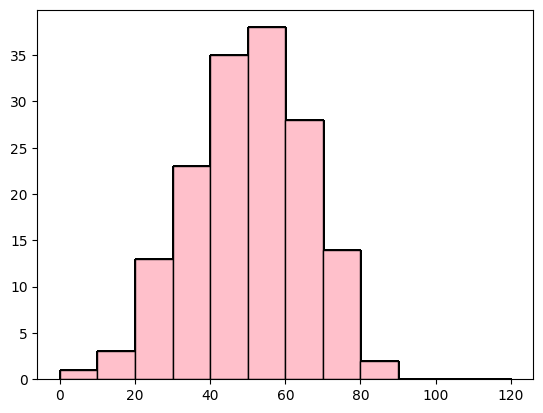

In [ ]:
ranges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]

plt.hist(df['age'], bins=ranges, color='pink', edgecolor='black')


time_1000 = timeit.timeit("plt.hist(edited_df['age'], bins=ranges, color='pink', edgecolor='black')", globals=globals(), number=1000)
print(f"Time is {time_1000:.6f} seconds")

Time is 6.620983 seconds


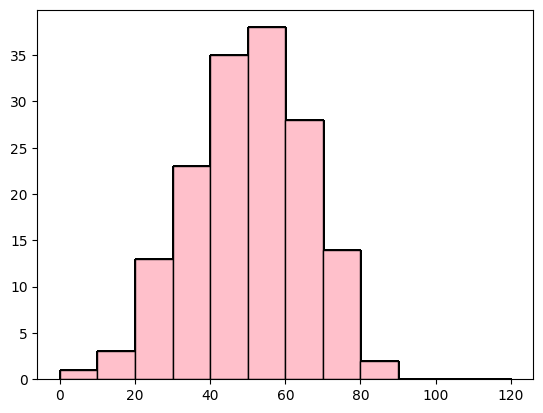

In [325]:
ranges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
co = df_numpy[:, 0].astype(float)

plt.hist(co, bins=ranges, color='pink', edgecolor='black')

time_1000 = timeit.timeit("plt.hist(df_numpy[:, 0].astype(float), bins=ranges, color='pink', edgecolor='black')", globals=globals(), number=1000)
print(f"Time is {time_1000:.6f} seconds")

4 задание

Збудувати графік залежності одного integer/real атрибута від іншого.

Time is 2.232799 seconds


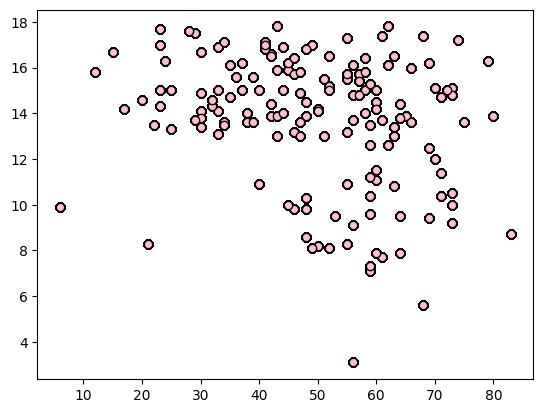

In [326]:
x = df["age"]
y = df["hemo"]
plt.scatter(x, y, color='pink', edgecolor='black')

time_1000 = timeit.timeit("plt.scatter(df['age'], df['hemo'], color='pink', edgecolor='black')", globals=globals(), number=1000)
print(f"Time is {time_1000:.6f} seconds")

Time is 2.293993 seconds


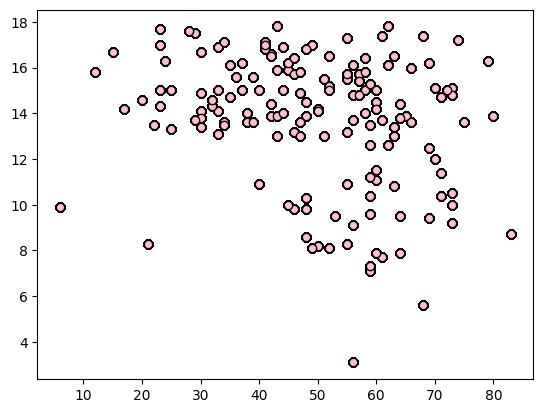

In [ ]:
x = df_numpy[:, 0].astype(float)
y = df_numpy[:, 14].astype(float)
plt.scatter(x, y, color='pink', edgecolor='black')

time_1000 = timeit.timeit("plt.scatter(df_numpy[:, 0].astype(float), df_numpy[:, 14].astype(float), color='pink', edgecolor='black')", globals=globals(), number=1000)
print(f"Time is {time_1000:.6f} seconds")

5 задание

Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real
атрибутів.

In [ ]:
def pearson_spearman(df):
    x = df["hemo"]
    y = df["bp"]

    pearson_coef = x.corr(y, method="pearson")
    spearman_coef = x.corr(y, method="spearman")

    return pearson_coef, spearman_coef

pearson_coef, spearman_coef = pearson_spearman(df)
print(f"Коефіцієнт Пірсона:  {pearson_coef:.4f}")
print(f"Коефіцієнт Спірмена: {spearman_coef:.4f}")

time_1000 = timeit.timeit("pearson_spearman(df)", globals=globals(), number=1000)
print(f"Time is {time_1000:.6f} seconds")

Коефіцієнт Пірсона:  -0.2852
Коефіцієнт Спірмена: -0.1391
Time is 0.622639 seconds


In [329]:
def pearson_spearman_(dataframe_numpy):

    x = dataframe_numpy[:, 14].astype(float)
    y = dataframe_numpy[:, 1].astype(float)
    pearson_coef, _ = pearsonr(x, y)
    spearman_coef, _ = spearmanr(x, y)

    return pearson_coef, spearman_coef

pearson_coef, spearman_coef = pearson_spearman_(df_numpy)
print(f"Коефіцієнт Пірсона:  {pearson_coef:.4f}")
print(f"Коефіцієнт Спірмена: {spearman_coef:.4f}")

time_1000 = timeit.timeit("pearson_spearman_(df_numpy)", globals=globals(), number=1000)
print(f"Time is {time_1000:.6f} seconds")

Коефіцієнт Пірсона:  -0.2852
Коефіцієнт Спірмена: -0.1391
Time is 0.916069 seconds


6 задание

Провести One Hot Encoding категоріального string атрибуту.

In [ ]:
def ohe_pandas(df):
    edited = df.copy()

    edited['rbc_'] = edited['rbc'].astype(str)

    df_ohe = pd.get_dummies(edited[["rbc", "rbc_"]], columns=['rbc_'], prefix='rbc')
    return df_ohe

display(ohe_pandas(df))

time_1000 = timeit.timeit("ohe_pandas(df)", globals=globals(), number=1000)
print(f"Time is {time_1000:.6f} seconds")


,rbc,rbc_abnormal,rbc_normal
0,abnormal,True,False
2,abnormal,True,False
5,normal,False,True
11,abnormal,True,False
13,normal,False,True
...,...,...,...
386,normal,False,True
387,normal,False,True
388,normal,False,True
389,normal,False,True


Time is 2.104886 seconds


In [332]:
def ohe_numpy(dataframe_numpy):

    rbc = np.array(dataframe_numpy[:, 5])

    unique_rbc = np.array(["normal","abnormal"])
    ohe = (rbc[:, None] == unique_rbc[None, :])

    con = np.concatenate((dataframe_numpy[:, 5][:, None], ohe), axis=1)
    return con

con = ohe_numpy(df_numpy)
df_ohe_np = pd.DataFrame(con, columns=['rbc'] + [f"rbc_{h}" for h in np.array(["normal","abnormal"])])
display(df_ohe_np)

time_1000 = timeit.timeit("ohe_numpy(df_numpy)", globals=globals(), number=1000)
print(f"Time is {time_1000:.6f} seconds")

,rbc,rbc_normal,rbc_abnormal
0,abnormal,False,True
1,abnormal,False,True
2,normal,True,False
3,abnormal,False,True
4,normal,True,False
...,...,...,...
152,normal,True,False
153,normal,True,False
154,normal,True,False
155,normal,True,False


Time is 0.063439 seconds


7 задание

Провести візуалізацію багатовимірних даних

<Figure size 1200x1000 with 0 Axes>

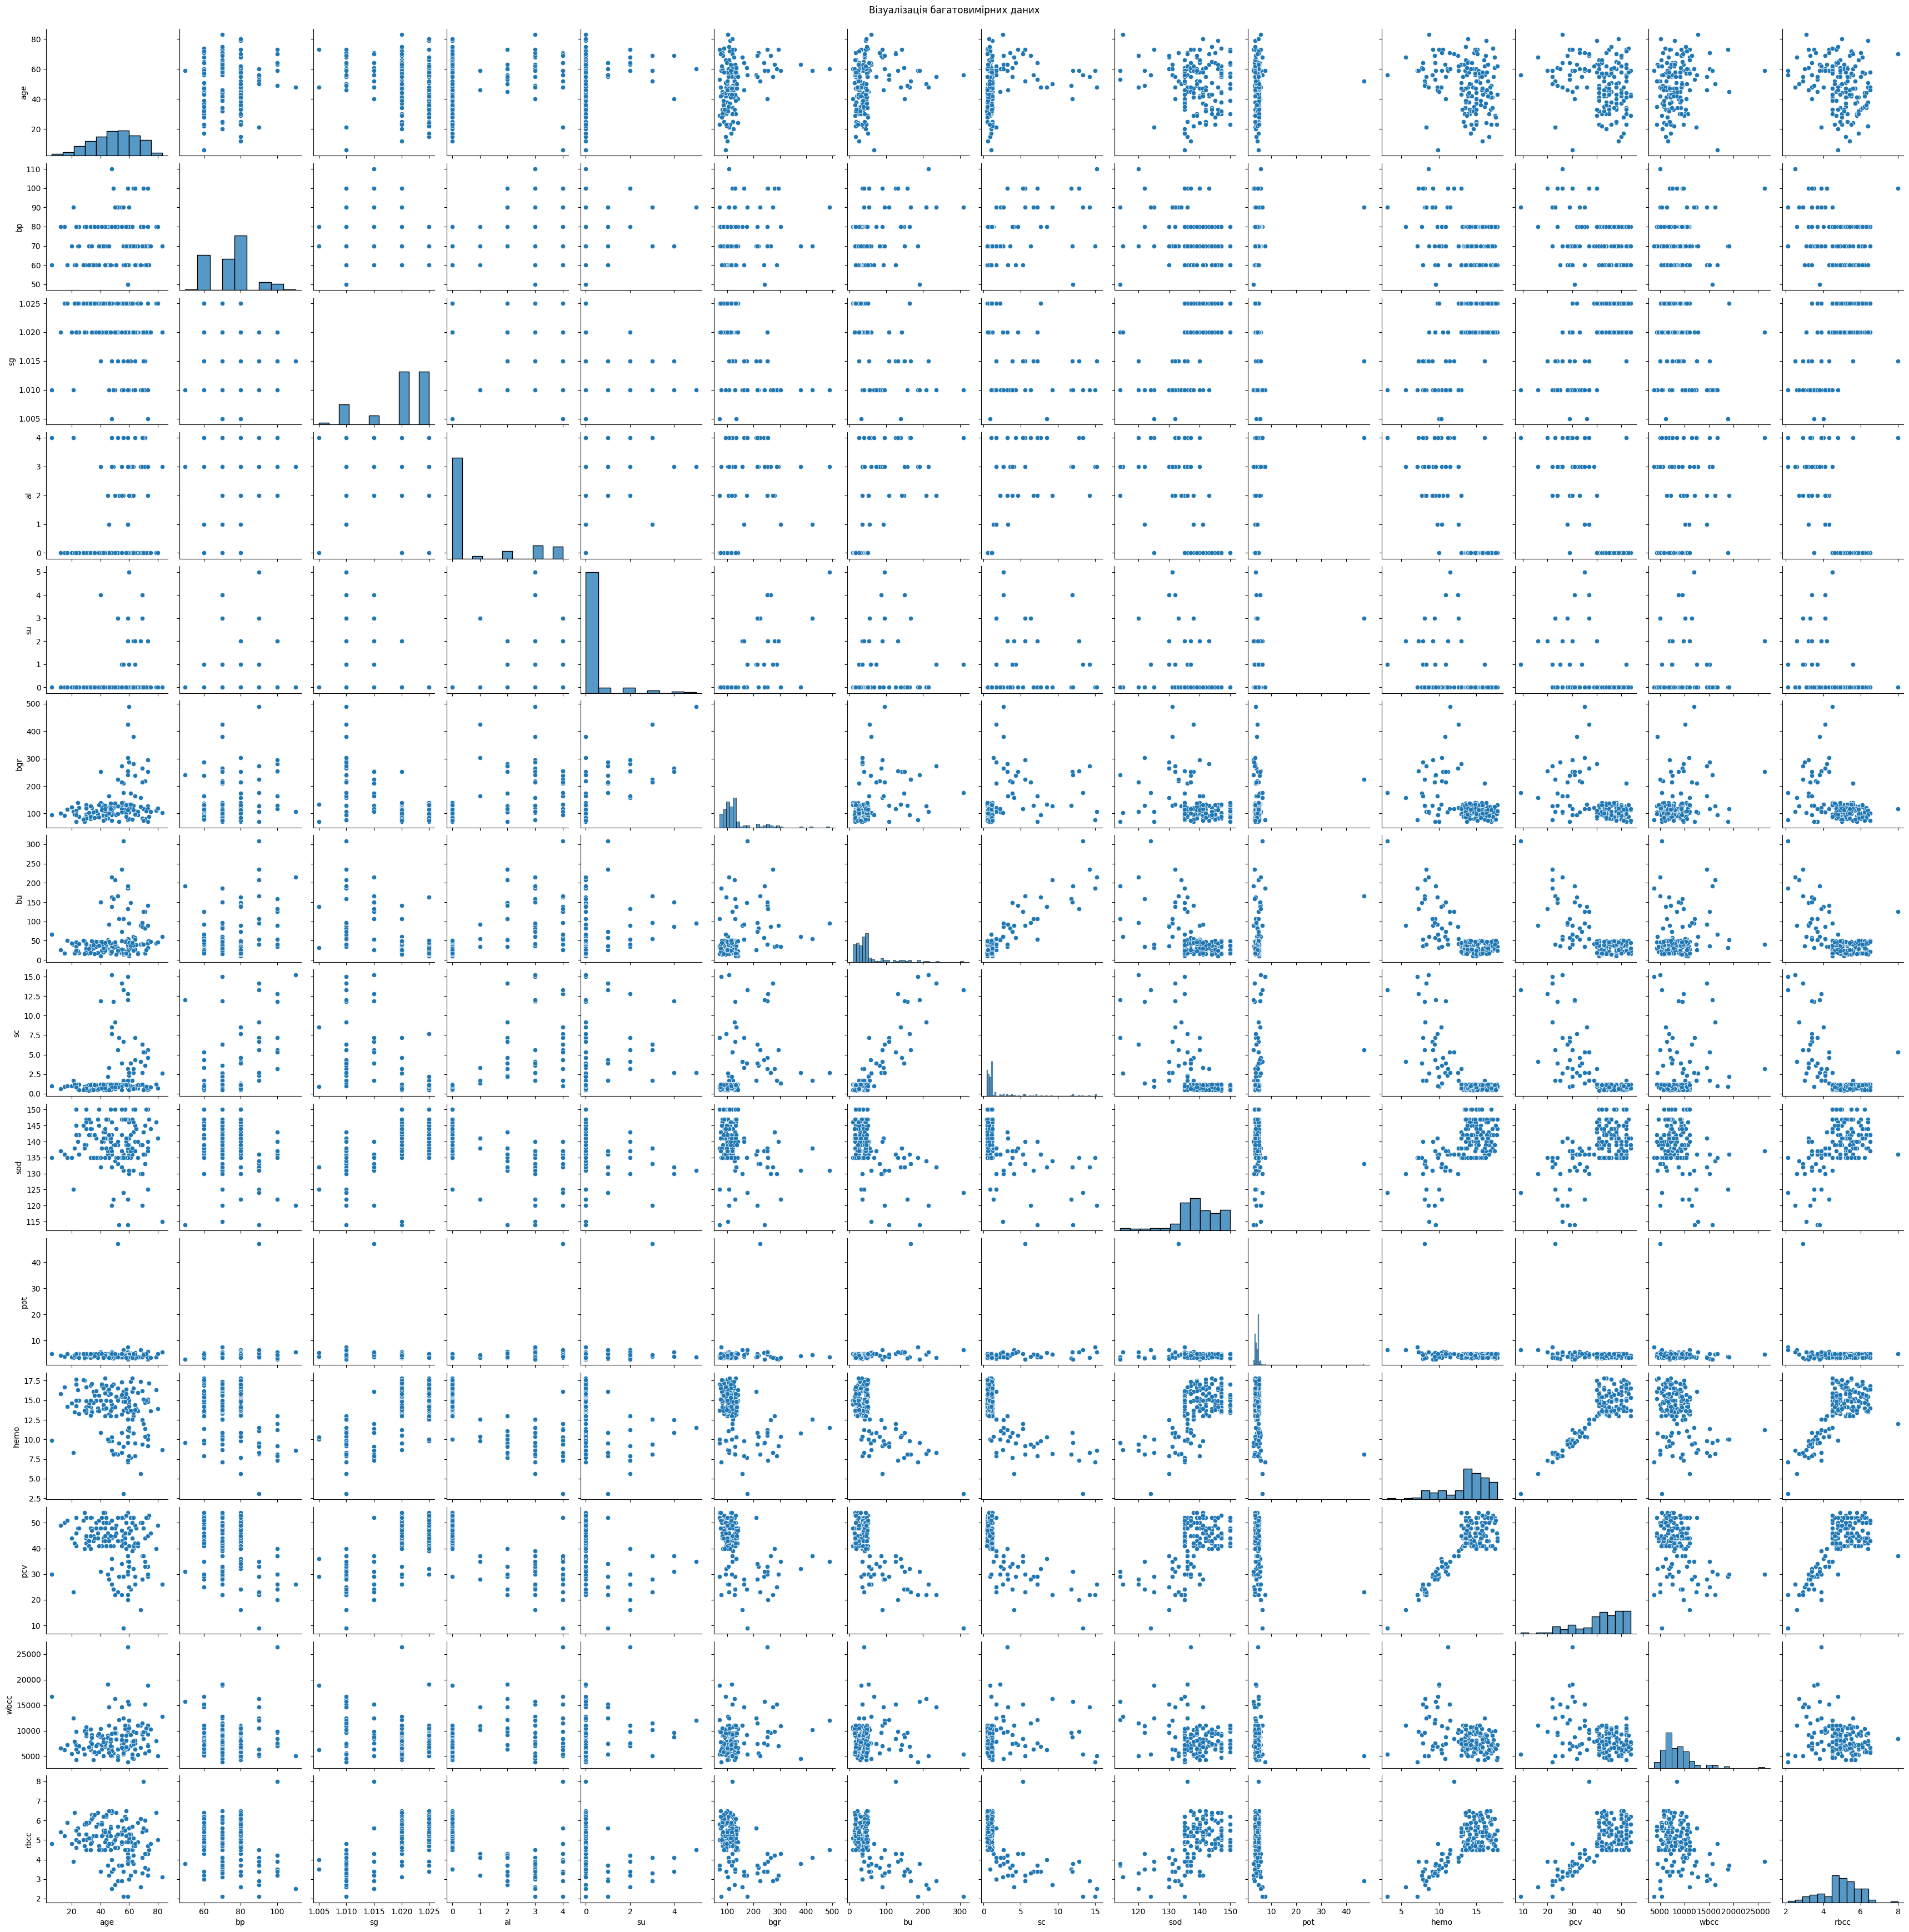

Time is 23.998728 seconds


In [ ]:
start_time = timeit.default_timer()

fig = plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(edited_df)
pairplot.fig.suptitle("Візуалізація багатовимірних даних", y=1)
plt.show()

end_time = timeit.default_timer()
print(f"Time is {(end_time-start_time):.6f} seconds")

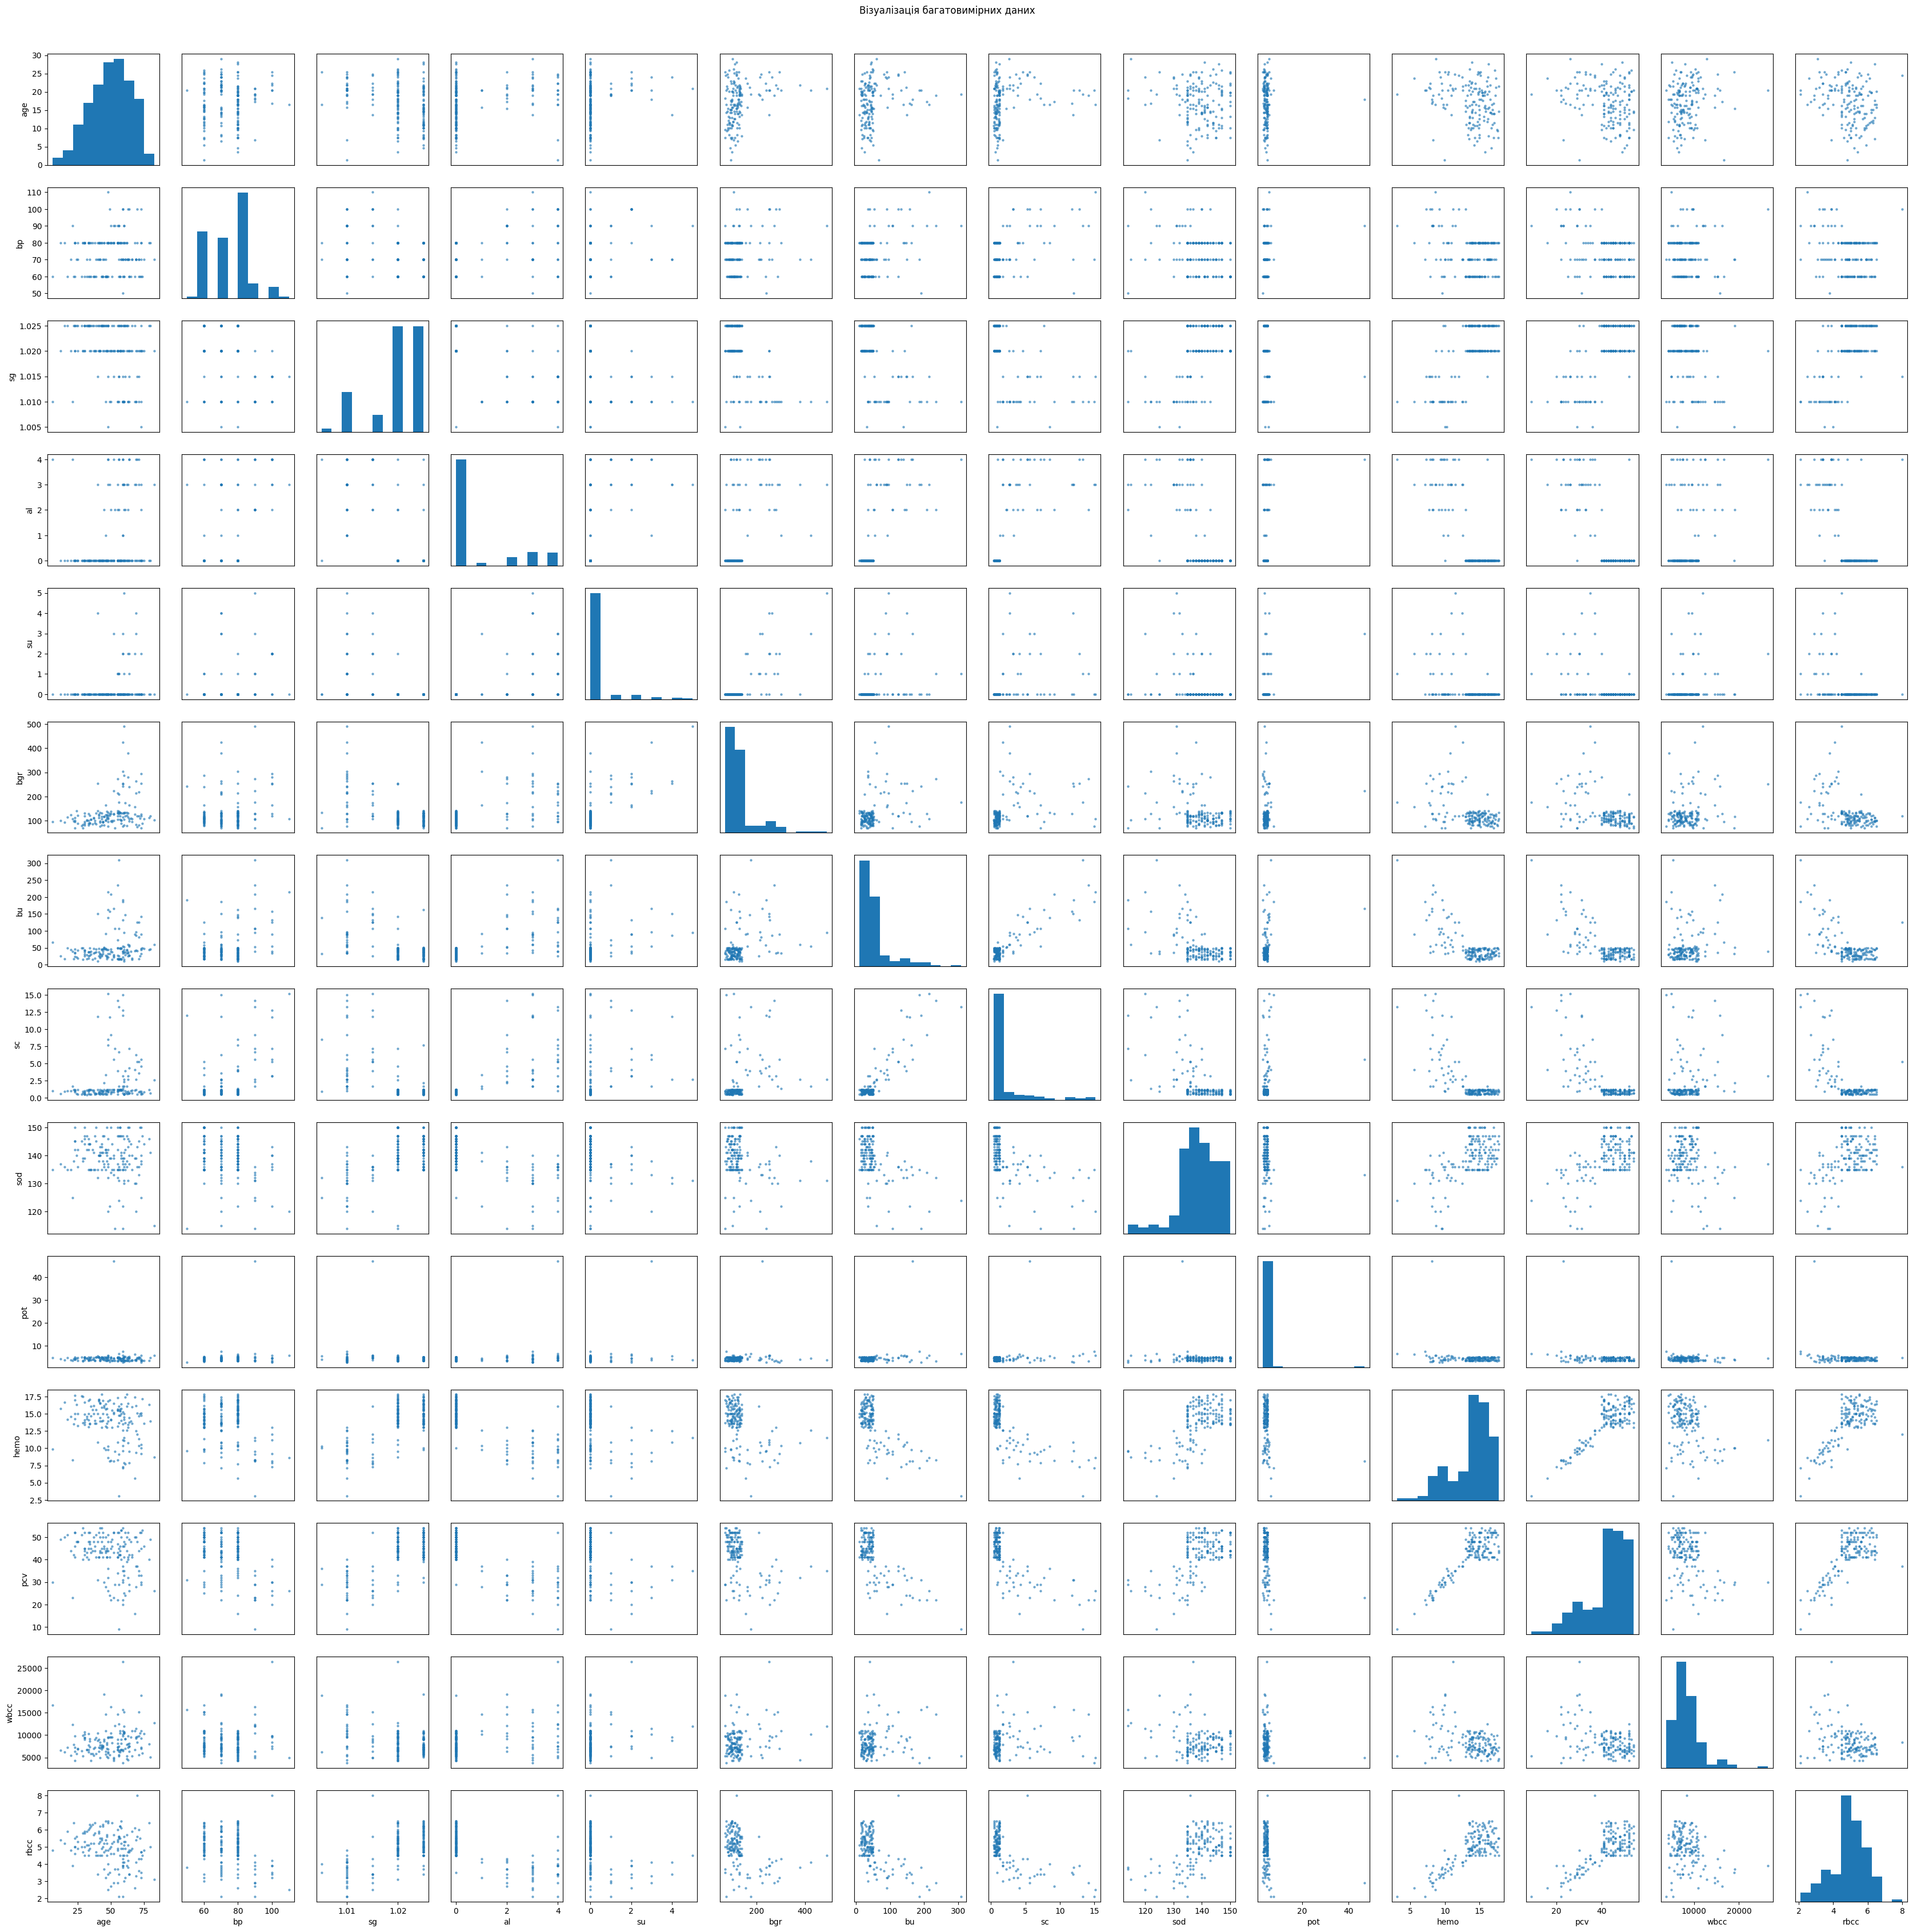

Time is 4.604266 seconds


In [334]:
start_time = timeit.default_timer()
data = df_numpy.copy()
names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class']

numeric_columns = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

numeric_indices = [names.index(col) for col in numeric_columns]
num_data = data[:, numeric_indices].astype(float)

p = num_data.shape[1]
fig, axes = plt.subplots(p, p, figsize=(3*p, 3*p))

for i in range(p):
    for j in range(p):
        ax = axes[i, j]
        if i == j:
            ax.hist(num_data[:, i], bins=10)
        else:
            ax.scatter(num_data[:, j], num_data[:, i], s=5, alpha=0.5)

        if i == p-1:
            ax.set_xlabel(numeric_columns[j])
        else:
            ax.set_xticks([])
        if j == 0:
            ax.set_ylabel(numeric_columns[i])
        else:
            ax.set_yticks([])

fig.suptitle("Візуалізація багатовимірних даних", y=0.9)
plt.show()

end_time = timeit.default_timer()
print(f"Time is {(end_time-start_time):.6f} seconds")

### Частина 1

| № | Pandas  | NumPy  |
|---------|------------|-----------|
| 1       | 0.584190 | 5.835844  |
| 2       | 11.730456 | 35.358529 |
| 3       | 1.324770 | 12.932155 |
| 4       | 21.808185 | 49.720310 |
| 5       |  8.705711 | 13.718624  |




### Частина 2

| № | Pandas | NumPy |
|---------|------------|-----------|
| 1       | 0.228346  |  0.053425  |
| 2.1    | 1 0.449613 | 0.460575  |
| 2.2    |  0.529000 | 0.531985 |
| 3       |  6.571741 | 6.620983 |
| 4       |  2.232799 | 2.293993  |
| 5       |  0.622639 | 0.916069  |
| 6       | 2.104886 | 0.063439  |
| 7       | 23.998728   | 4.604266 |

